In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'data/train.csv'
wine = pd.read_csv(path, index_col=0)
quality = wine.pop('quality')
wine.shape, quality.shape

((5497, 12), (5497,))

1. 목표: wine -> quality
2. f(wine) = quality (classification)

3. sample: 5497 -> machine learning model 이용
4. quality balance 확인
5. feature: 12 -> 범위 확인 -> normalization
6. feature 종속성 확인

7. prototype 모델 (LR, DT, SVM)

# Labels
### Quality balance 확인

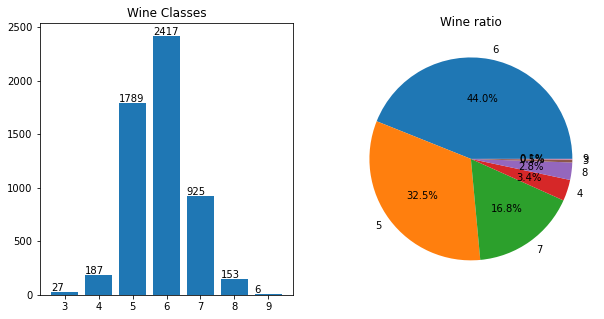

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


In [4]:

classes = dict(quality.value_counts())

# fig
fig, axes= plt.subplots(1,2) 
fig.set_size_inches((10,5))
# bar plot
axes[0].set_title("Wine Classes")
axes[0].bar(classes.keys(), classes.values())

for k, v in zip(quality.value_counts().index, quality.value_counts().values):
    axes[0].text(k-0.4, v+10,f'{v+1}')

ratio = classes.values()
labels = classes.keys()
axes[1].set_title('Wine ratio')
axes[1].pie(ratio, labels=labels, autopct='%.1f%%')


plt.show()
plt.close()
print(quality.value_counts())

# Data 
### Data type change


In [5]:
wine['type'][wine['type']=='red'] = 0
wine['type'][wine['type']=='white'] = 1
wine

/home/smsm8898/libraries/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/smsm8898/libraries/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve,accuracy_score, confusion_matrix, plot_confusion_matrix

def train_models(x_train, y_train):
    LR = LogisticRegression(random_state=123).fit(x_train, y_train)
    DT = DecisionTreeClassifier(random_state=123).fit(x_train, y_train)
    RF = RandomForestClassifier(random_state=123).fit(x_train, y_train)
    
    
    return {'LR':LR, 'DT':DT, 'RF':RF}

def get_scores(models, x_test, y_test):
    scores = {}
    
    scores['LR'] = models['LR'].score(x_test, y_test)
    scores['DT'] = models['DT'].score(x_test, y_test)
    scores['RF'] = models['RF'].score(x_test, y_test)
    return scores

In [6]:
# Train/Test Split
indexs = range(wine.shape[0])
train, test = train_test_split(indexs, test_size=0.1)

# No feature engineering

In [7]:
result = {}

No feature engineering


The accuracy of LR is 45.27
The accuracy of DT is 58.36
The accuracy of RF is 69.82


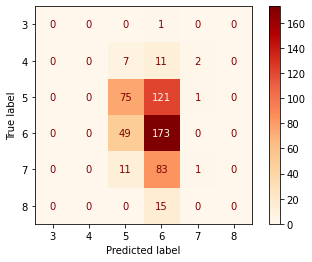

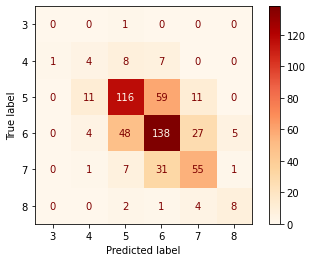

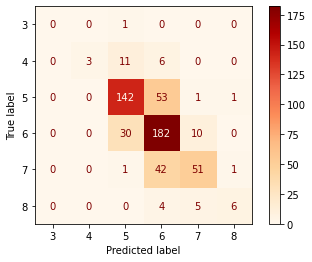

In [8]:
import warnings
warnings.filterwarnings(action='ignore')
x_train, y_train, x_test, y_test = wine.iloc[train], quality.iloc[train], wine.iloc[test], quality.iloc[test]
models = train_models(x_train, y_train)
scores = get_scores(models, x_test, y_test)
print("No feature engineering\n\n")
for name, score in scores.items():
    score = score*100
    
    plot_confusion_matrix(models[name], x_test, y_test,cmap='OrRd')
    print('The accuracy of {} is {:2.2f}'.format(name, score))
result['Origin']=scores

# 1. Normalize

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


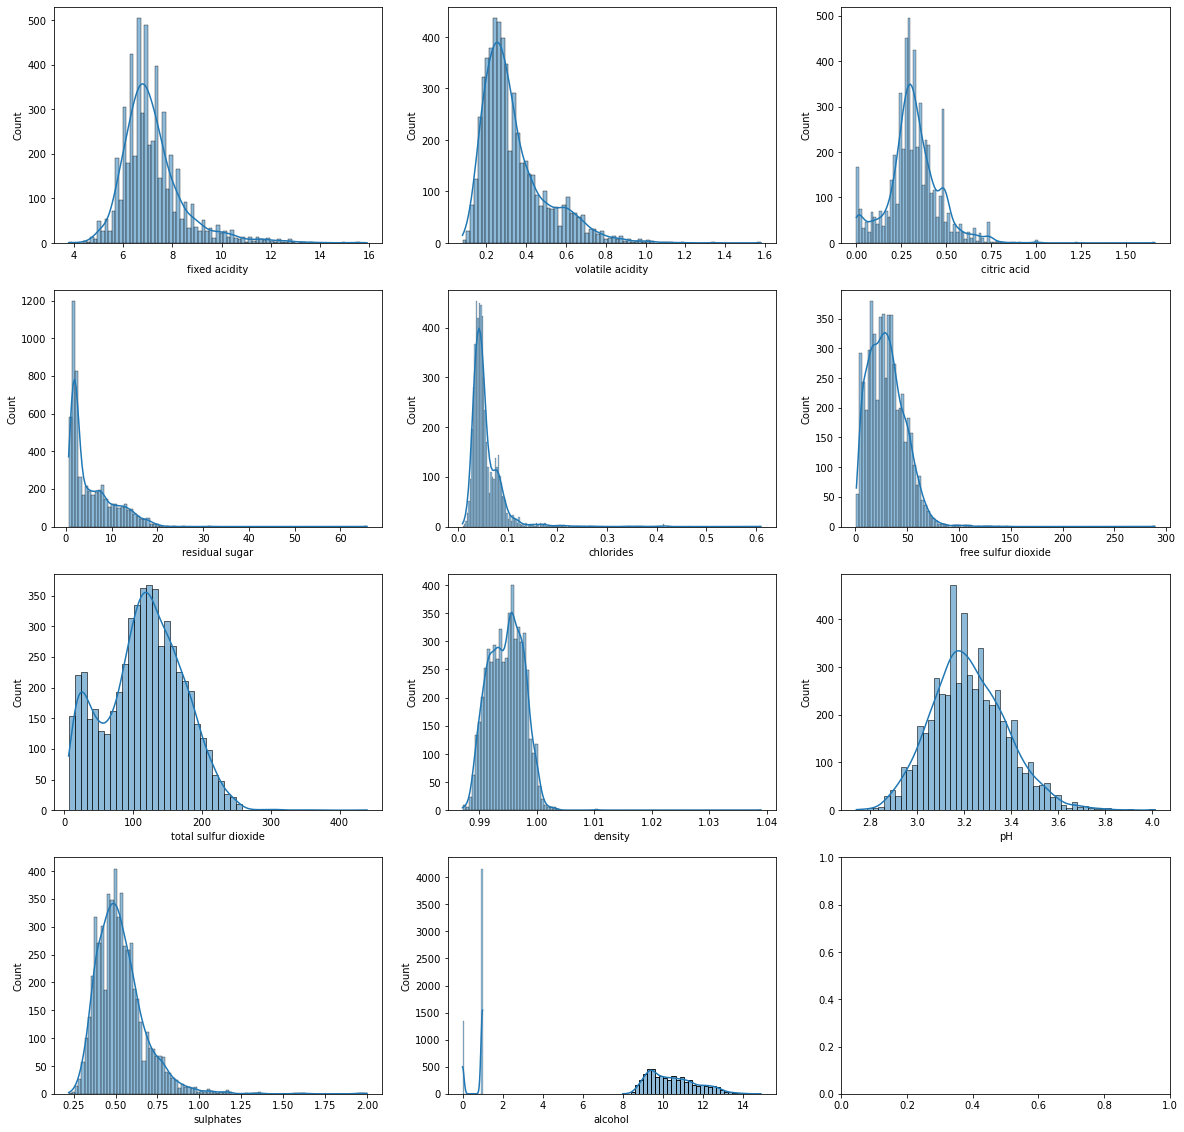

In [10]:
import seaborn as sns
f, axes = plt.subplots(4,3, figsize=(20, 20))
stats = {}
for i, (k, v) in enumerate(wine.items()):
    if k == 'type': 
        sns.histplot( ax=axes[row][col], data=v, kde=True)
        continue
    row, col = i // 3, i % 3
    sns.histplot( ax=axes[row][col], data=v, kde=True)
    mean, std = v.mean(), v.std()
    v = (v-mean)/std
    wine[k]=v

Normalization


The accuracy of LR is 55.27
The accuracy of DT is 58.55
The accuracy of RF is 70.00


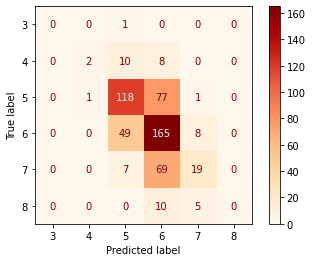

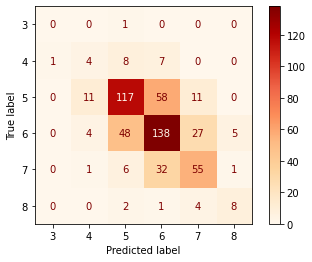

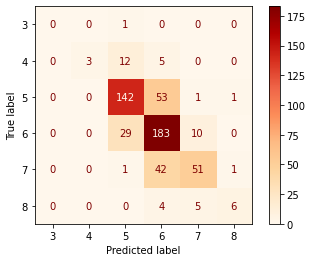

In [11]:
x_train, y_train, x_test, y_test = wine.iloc[train], quality.iloc[train], wine.iloc[test], quality.iloc[test]
models = train_models(x_train, y_train)
scores = get_scores(models, x_test, y_test)
print("Normalization\n\n")
for name, score in scores.items():
    score = score*100
    
    plot_confusion_matrix(models[name], x_test, y_test,cmap='OrRd')
    print('The accuracy of {} is {:2.2f}'.format(name, score))
    
result['Normalization'] = scores

In [12]:
result

{'Origin': {'LR': 0.4527272727272727,
  'DT': 0.5836363636363636,
  'RF': 0.6981818181818182},
 'Normalization': {'LR': 0.5527272727272727,
  'DT': 0.5854545454545454,
  'RF': 0.7}}

# 2. Correlation

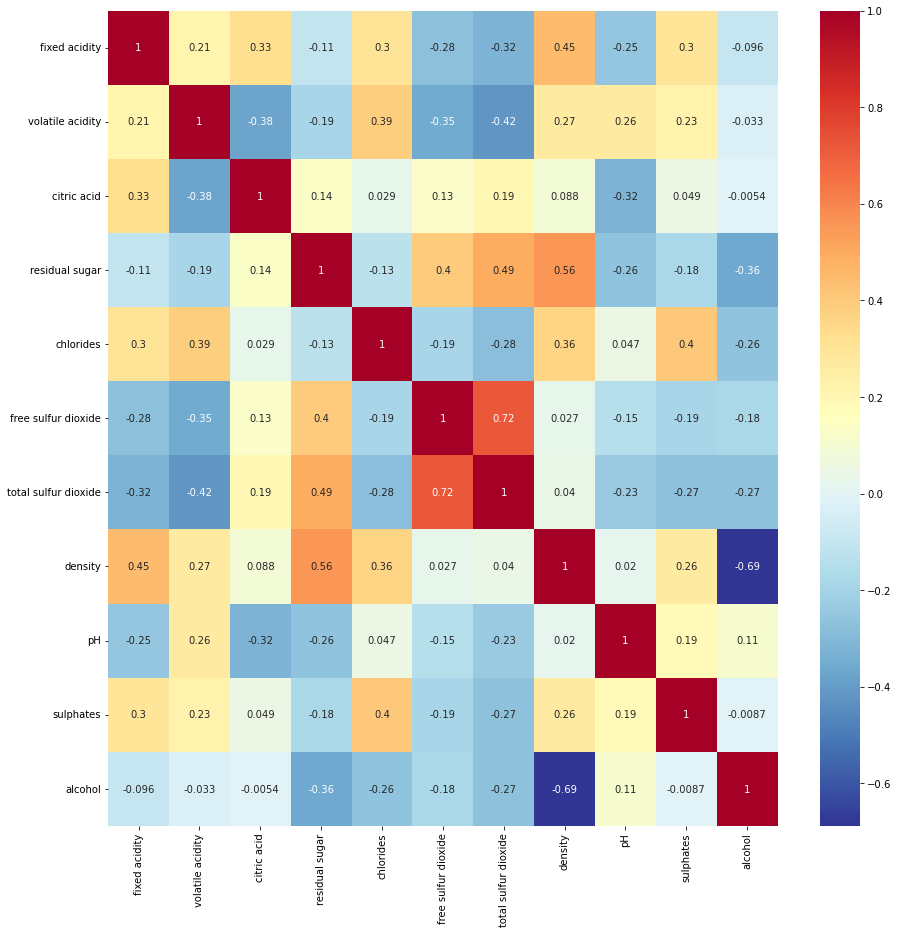

In [13]:
plt.figure(figsize=(15,15))
corr = wine.corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu_r')
plt.show()


In [14]:
corr[corr > 0.6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.716829,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.716829,1.000000,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [15]:
from sklearn.decomposition import PCA
feature = ['total sulfur dioxide','free sulfur dioxide']

x = wine[feature]
pca = PCA(n_components=1)
x = pca.fit_transform(x)
wine = wine.drop(feature, axis=1)
wine['pca1'] = x
wine.shape

(5497, 11)

In [16]:
corr[corr < -0.6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.688053
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
from sklearn.decomposition import PCA
feature = ['alcohol','density']

x = wine[feature]
pca = PCA(n_components=1)
x = pca.fit_transform(x)
wine = wine.drop(feature, axis=1)
wine['pca2'] = x
wine.shape

(5497, 10)

PCA


The accuracy of LR is 54.73
The accuracy of DT is 63.27
The accuracy of RF is 71.45


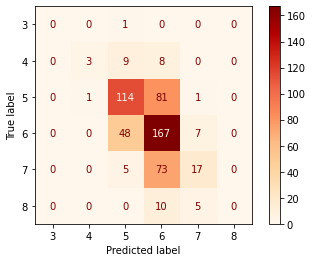

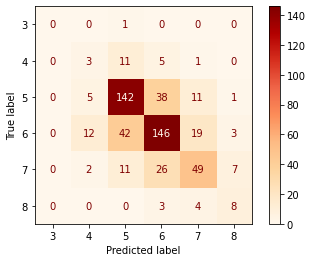

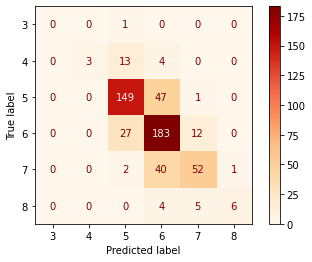

In [18]:
x_train, y_train, x_test, y_test = wine.iloc[train], quality.iloc[train], wine.iloc[test], quality.iloc[test]
models = train_models(x_train, y_train)
scores = get_scores(models, x_test, y_test)
print("PCA\n\n")
for name, score in scores.items():
    score = score*100
    
    plot_confusion_matrix(models[name], x_test, y_test,cmap='OrRd')
    print('The accuracy of {} is {:2.2f}'.format(name, score))
    
result['PCA'] = scores

In [19]:
result

{'Origin': {'LR': 0.4527272727272727,
  'DT': 0.5836363636363636,
  'RF': 0.6981818181818182},
 'Normalization': {'LR': 0.5527272727272727,
  'DT': 0.5854545454545454,
  'RF': 0.7},
 'PCA': {'LR': 0.5472727272727272,
  'DT': 0.6327272727272727,
  'RF': 0.7145454545454546}}

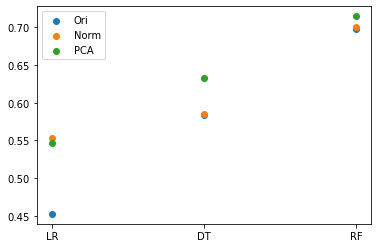

In [85]:
plt.scatter(result['Origin'].keys(), result['Origin'].values(), label='Ori')
plt.scatter(result['Normalization'].keys(), result['Normalization'].values(), label='Norm')
plt.scatter(result['PCA'].keys(), result['PCA'].values(), label='PCA')
plt.legend()
plt.show()